In [21]:
import librosa
import IPython.display as ipd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import csv
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import MeanShift, KMeans, AffinityPropagation, AgglomerativeClustering, FeatureAgglomeration, SpectralClustering, estimate_bandwidth
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, v_measure_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [2]:
#We’ll process dataset as per our requirements. 
#We’ll create a CSV file with the data we required.
header = 'Filename Chromagram RootMeanSquare LowEnergyBrightness SpectralCentroid Flatness Bandwidth InHarmonicity Rolloff ZeroCrossingRate'
for i in range(1,21):
        header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
#If you have read the blog of features extraction 
#we’ll get 20 mfcc for given sampling rate because
#it is calculated for each frame so mfcc has 20 columns.
#Now, we’ll calculate all the features.
file = open('extractedmusicfeatureset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        y = librosa.effects.harmonic(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)#chromagram
        rms = librosa.feature.rms(y=y)#root-mean square
        spec_cont = librosa.feature.spectral_contrast(y=y, sr=sr)#low energy/brightness
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)#spectral centroid
        spec_flat = librosa.feature.spectral_flatness(y=y)#flatness
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)#bandwidth
        tone = librosa.feature.tonnetz(y=y, sr=sr)#In-Harmonicity
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)#rolloff
        zcr = librosa.feature.zero_crossing_rate(y)#zero-crossing rate
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cont)} {np.mean(spec_cent)} {np.mean(spec_flat)} {np.mean(spec_bw)} {np.mean(tone)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('extractedmusicfeatureset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [ ]:
##Split audio files goes here when refactored##

In [3]:
# Dropping unneccesary columns
data = pd.read_csv('data_test_two.csv')
data = data.drop(['Filename'],axis=1) #Filename is not required
data.head()

KeyError: "['filename'] not found in axis"

In [4]:
features = ['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4017CD888>,
      dtype=object)

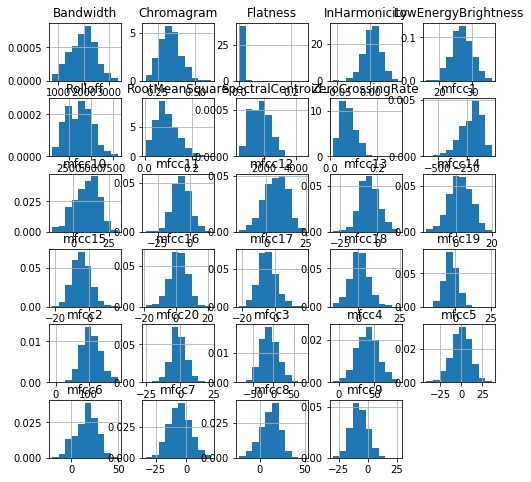

In [5]:
X_prenorm = data[features]
pd.DataFrame(X_prenorm,columns=features).hist(figsize=(8,8), normed=True)

In [6]:
#maybe should be X_prenorm.groupby instead
genre_count = data.groupby('label').agg({'label':'count'})['label']
print(genre_count)

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64


In [9]:
norm = Normalizer()
data[features] = norm.fit_transform(data[features])

In [10]:
genre_groupby = data.groupby('label').agg('mean')
clusters = genre_groupby.reset_index().rename({'label':'cluster'}, axis=1)
clusters['method'] = 'Mean'

oldclusters = clusters
oldclusters

,cluster,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,method
0,blues,0.000094,0.000031,0.009293,0.380919,1.472752e-07,0.497950,1.764796e-06,0.760674,0.000017,...,0.000070,-0.001596,-0.000428,-0.001610,-0.000998,-0.002216,-0.001265,-0.000997,-0.001504,Mean
1,classical,0.000092,0.000014,0.011597,0.423504,9.240511e-08,0.466861,1.689997e-06,0.752618,0.000026,...,-0.000787,-0.001043,-0.000600,-0.000530,0.000144,-0.000121,0.000161,-0.000512,-0.000553,Mean
2,country,0.000088,0.000028,0.007553,0.382816,6.450092e-07,0.488907,4.512971e-07,0.774607,0.000017,...,0.000420,-0.001416,-0.000664,-0.001317,-0.000742,-0.001642,-0.000527,-0.000777,-0.001477,Mean
3,disco,0.000063,0.000016,0.004298,0.381492,1.862054e-06,0.414360,7.291010e-07,0.823642,0.000017,...,0.000913,-0.000936,0.000375,-0.000818,0.000055,-0.000710,0.000058,-0.000422,-0.000081,Mean
4,hiphop,0.000080,0.000024,0.005149,0.367350,1.078419e-06,0.433657,7.630485e-08,0.818066,0.000013,...,0.002214,-0.000678,0.001344,-0.000745,0.000966,-0.000875,0.000548,-0.000617,-0.000092,Mean
5,jazz,0.000082,0.000022,0.009144,0.391381,2.457354e-07,0.479119,6.575307e-07,0.773051,0.000018,...,0.000765,-0.001082,0.000565,-0.001038,0.000329,-0.000650,-0.000145,-0.000658,-0.000625,Mean
6,metal,0.000075,0.000019,0.004849,0.404616,6.715851e-07,0.383711,4.693696e-07,0.828500,0.000020,...,0.002295,-0.002012,0.000820,-0.001428,0.000670,-0.001276,0.000166,-0.000592,-0.000216,Mean
7,pop,0.000061,0.000024,0.004795,0.368275,1.336981e-06,0.429988,4.505831e-07,0.820585,0.000014,...,0.001634,-0.001518,0.001181,-0.001354,0.001025,-0.001173,0.001250,-0.000731,0.000984,Mean
8,reggae,0.000091,0.000022,0.005943,0.371722,1.283233e-06,0.484319,8.103830e-08,0.782147,0.000014,...,0.001258,0.000248,0.000360,0.000020,-0.000050,-0.000764,0.000030,-0.000520,-0.000715,Mean
9,rock,0.000077,0.000022,0.006597,0.385890,5.245906e-07,0.442609,8.823127e-07,0.803386,0.000017,...,0.001471,-0.001938,0.000383,-0.001565,0.000092,-0.001752,-0.000075,-0.001083,-0.000518,Mean


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D40339D588>,
      dtype=object)

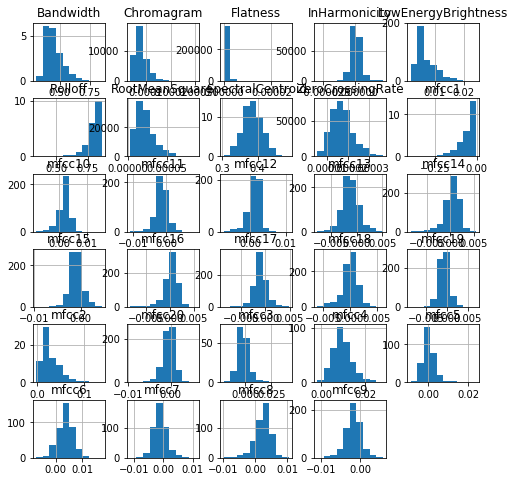

In [11]:
data[features].hist(figsize=(8,8), normed=True)

Text(0.5, 1.0, 'Elbow Method')

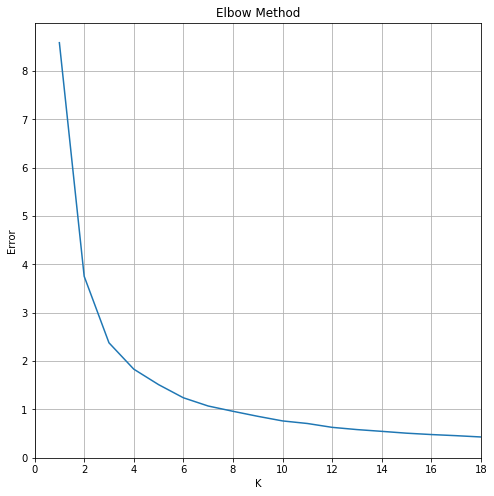

In [14]:
X = data[['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate']]

Ks = np.arange(1, 20)
km = [KMeans(n_clusters=i, random_state=1986) for i in Ks]
score = [-km[i].fit(X).score(X) for i in range(len(km))]
Ks.dtype = int
plt.figure(figsize=(8,8))
plt.plot(Ks,score)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Elbow Method')

Text(0.5, 0, 'K')

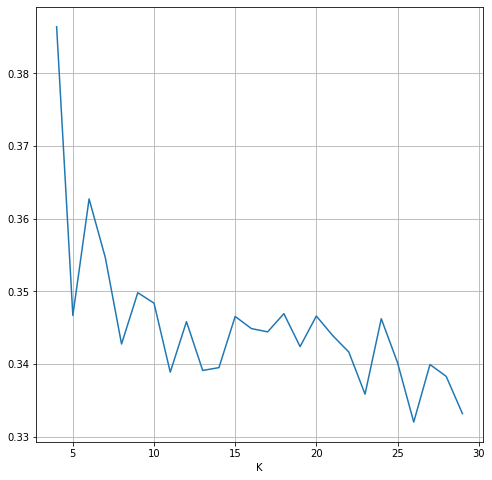

In [15]:
Ks = np.arange(2, 30)
kms = [KMeans(n_clusters=i, random_state=1986).fit(X) for i in Ks]
s_scores = [silhouette_score(X,kms[i].labels_) for i in range(2,len(Ks))]
plt.figure(figsize=(8,8))
plt.plot(Ks[2:len(Ks)],s_scores)
#plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')

In [17]:
X = data[['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']]
km = KMeans(n_clusters=len(genre_groupby), n_init=10, random_state=1986)
km.fit(X)
labels = km.labels_
cluster_centers = km.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
km_clusters = pd.DataFrame(cluster_centers, columns=features)
km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
km_clusters['method'] = 'KMeans'
oldclusters = pd.concat([oldclusters, km_clusters])
cols = ['cluster'] + features + ['method']
oldclusters = oldclusters[cols]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [18]:
newclusters = oldclusters

In [19]:
newclusters

,cluster,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,method
0,blues,0.000094,0.000031,0.009293,0.380919,1.472752e-07,0.497950,1.764796e-06,0.760674,0.000017,...,0.000070,-0.001596,-0.000428,-0.001610,-0.000998,-0.002216,-0.001265,-0.000997,-0.001504,Mean
1,classical,0.000092,0.000014,0.011597,0.423504,9.240511e-08,0.466861,1.689997e-06,0.752618,0.000026,...,-0.000787,-0.001043,-0.000600,-0.000530,0.000144,-0.000121,0.000161,-0.000512,-0.000553,Mean
2,country,0.000088,0.000028,0.007553,0.382816,6.450092e-07,0.488907,4.512971e-07,0.774607,0.000017,...,0.000420,-0.001416,-0.000664,-0.001317,-0.000742,-0.001642,-0.000527,-0.000777,-0.001477,Mean
3,disco,0.000063,0.000016,0.004298,0.381492,1.862054e-06,0.414360,7.291010e-07,0.823642,0.000017,...,0.000913,-0.000936,0.000375,-0.000818,0.000055,-0.000710,0.000058,-0.000422,-0.000081,Mean
4,hiphop,0.000080,0.000024,0.005149,0.367350,1.078419e-06,0.433657,7.630485e-08,0.818066,0.000013,...,0.002214,-0.000678,0.001344,-0.000745,0.000966,-0.000875,0.000548,-0.000617,-0.000092,Mean
5,jazz,0.000082,0.000022,0.009144,0.391381,2.457354e-07,0.479119,6.575307e-07,0.773051,0.000018,...,0.000765,-0.001082,0.000565,-0.001038,0.000329,-0.000650,-0.000145,-0.000658,-0.000625,Mean
6,metal,0.000075,0.000019,0.004849,0.404616,6.715851e-07,0.383711,4.693696e-07,0.828500,0.000020,...,0.002295,-0.002012,0.000820,-0.001428,0.000670,-0.001276,0.000166,-0.000592,-0.000216,Mean
7,pop,0.000061,0.000024,0.004795,0.368275,1.336981e-06,0.429988,4.505831e-07,0.820585,0.000014,...,0.001634,-0.001518,0.001181,-0.001354,0.001025,-0.001173,0.001250,-0.000731,0.000984,Mean
8,reggae,0.000091,0.000022,0.005943,0.371722,1.283233e-06,0.484319,8.103830e-08,0.782147,0.000014,...,0.001258,0.000248,0.000360,0.000020,-0.000050,-0.000764,0.000030,-0.000520,-0.000715,Mean
9,rock,0.000077,0.000022,0.006597,0.385890,5.245906e-07,0.442609,8.823127e-07,0.803386,0.000017,...,0.001471,-0.001938,0.000383,-0.001565,0.000092,-0.001752,-0.000075,-0.001083,-0.000518,Mean


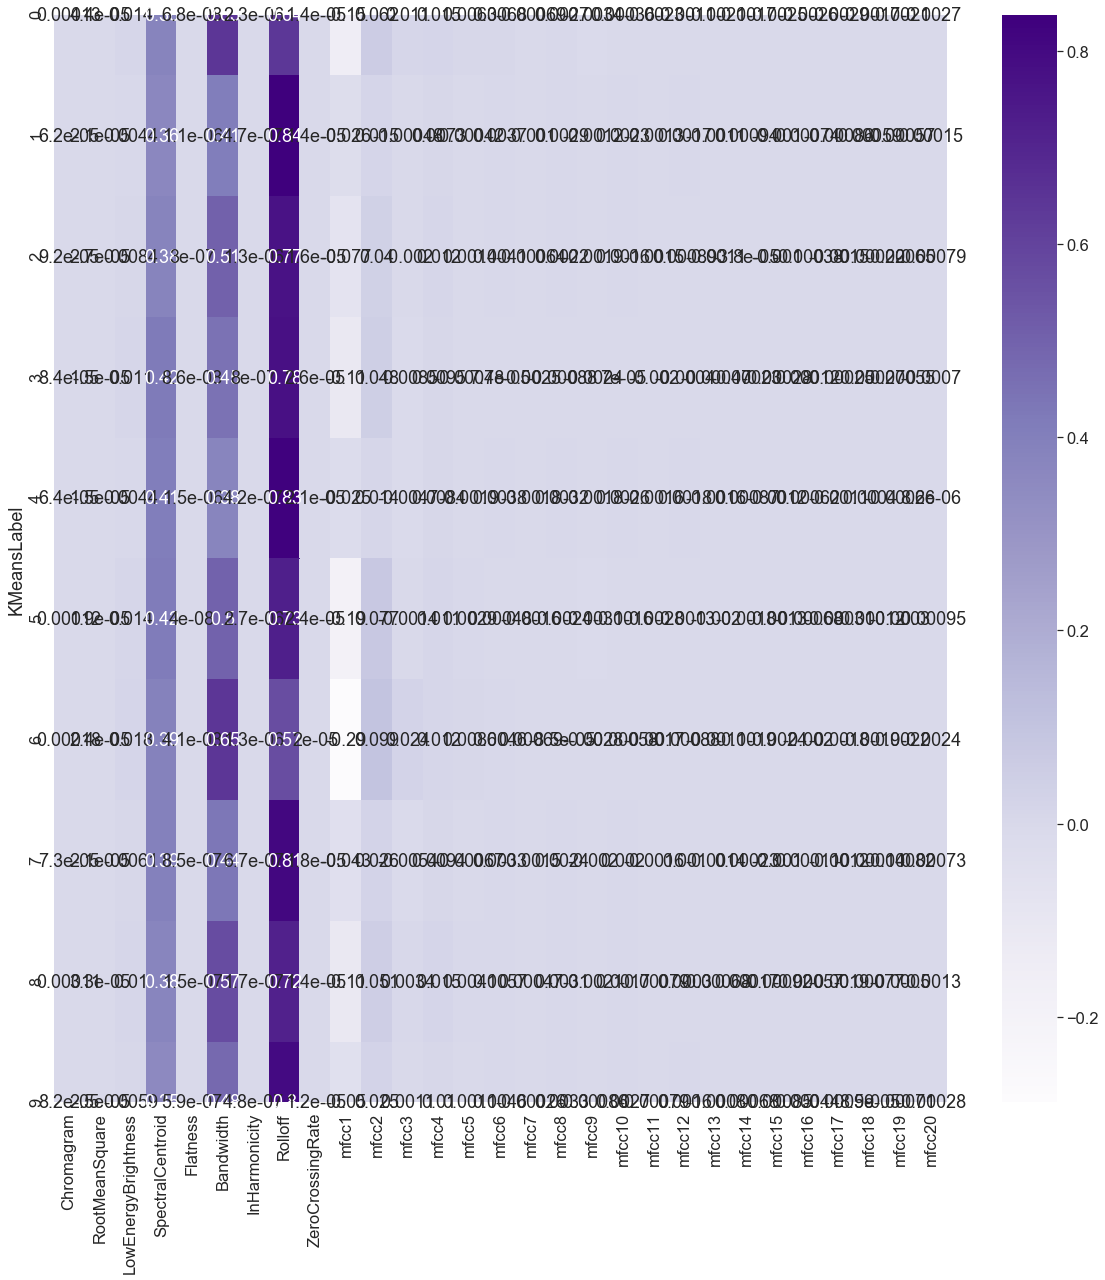

In [22]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
sns.heatmap(
    data=newclusters.loc[newclusters.method=='KMeans', features],
    cmap='Purples',
    annot=True
)
plt.ylabel("KMeansLabel")
plt.savefig('heatmap_all.png')

In [23]:
#distances = [abs(np.linalg.norm(genre_coordinates-c)) for c in genre_coordinates_other]
### Assign K-Means Label to Descriptive Labels
descriptive_labels = ["Slow & Somber Acoustics", "Sad Instrumentals", "Upbeat Songs With Cheerful Vocals", 
                      "Fast & Danceable Instrumentals", "Fast, Upbeat & Cheerful Songs", "Happy & Upbeat Instrumentals",
                      "Aggressive, Fast Paced Acoustics", "Slow Happy Dance", "Happy & Slow", "Fast, Upbeat & Cheerful Acoustics"]

descriptive_labels = ["Slow & Somber Acoustics","Sad Instrumentals", "Upbeat Songs With Cheerful Vocals", 
                      "Fast & Danceable Instrumentals", "Fast, Upbeat & Cheerful Songs", "Happy & Upbeat Instrumentals",
                      "Aggressive, Fast Paced Acoustics", "Slow Happy Dance", "Happy & Slow", "Fast, Upbeat & Cheerful Acoustics"]
unique_labels = np.unique(labels)
translated_labels = dict(zip(unique_labels, descriptive_labels))
data['KMeansLabel'] = list(map(lambda x:translated_labels[x], labels))
################################################################################
#####################TRy other clustering algorithms############################
################################################################################

genre_count = data.groupby('label').agg({'label':'count'})['label']

# How many instances of each k-means cluster are there?
print("### Instances of KMeans Cluster ###")
print(data[['label', 'KMeansLabel']].groupby('KMeansLabel').agg('count'))

# Which cluster corresponds to the most instances per genre?
print("### Which cluster corresponds to the most instances per genre? ###")
print(data[['label', 'KMeansLabel']].groupby('label').agg(lambda x:x.value_counts().index[0]))

# Which genre corresponds to the most instances per cluster?
print("### Which genre corresponds to the most instances per cluster? ###")
print(data[['label', 'KMeansLabel']].groupby('KMeansLabel').agg(lambda x:x.value_counts().index[0]))

### Instances of KMeans Cluster ###
                                   label
KMeansLabel                             
Aggressive, Fast Paced Acoustics      13
Fast & Danceable Instrumentals        72
Fast, Upbeat & Cheerful Acoustics     97
Fast, Upbeat & Cheerful Songs        190
Happy & Slow                          73
Happy & Upbeat Instrumentals          36
Sad Instrumentals                    217
Slow & Somber Acoustics               24
Slow Happy Dance                     160
Upbeat Songs With Cheerful Vocals    118
### Which cluster corresponds to the most instances per genre? ###
                                 KMeansLabel
label                                       
blues                           Happy & Slow
classical     Fast & Danceable Instrumentals
country    Upbeat Songs With Cheerful Vocals
disco                      Sad Instrumentals
hiphop                     Sad Instrumentals
jazz       Upbeat Songs With Cheerful Vocals
metal          Fast, Upbeat & Cheerful Songs


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
x,y = zip(*X_new)
data['x'] = x
data['y'] = y
components = pca.components_
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_

In [25]:
audio_components = dict(list(zip(features, zip(*np.round(components,2)))))
audio_components

{'Chromagram': (0.0, 0.0),
 'RootMeanSquare': (0.0, -0.0),
 'LowEnergyBrightness': (0.03, 0.03),
 'SpectralCentroid': (0.0, 0.59),
 'Flatness': (-0.0, -0.0),
 'Bandwidth': (0.68, -0.51),
 'InHarmonicity': (0.0, 0.0),
 'Rolloff': (-0.54, -0.1),
 'ZeroCrossingRate': (-0.0, 0.0),
 'mfcc1': (-0.46, -0.58),
 'mfcc2': (0.18, 0.18),
 'mfcc3': (0.03, -0.06),
 'mfcc4': (0.02, -0.01),
 'mfcc5': (0.02, -0.02),
 'mfcc6': (0.0, -0.03),
 'mfcc7': (0.0, -0.02),
 'mfcc8': (-0.01, -0.03),
 'mfcc9': (-0.0, -0.01),
 'mfcc10': (-0.01, -0.02),
 'mfcc11': (-0.0, -0.01),
 'mfcc12': (-0.01, -0.01),
 'mfcc13': (0.0, -0.01),
 'mfcc14': (-0.01, -0.01),
 'mfcc15': (-0.0, -0.0),
 'mfcc16': (-0.01, -0.0),
 'mfcc17': (-0.0, 0.0),
 'mfcc18': (-0.0, -0.0),
 'mfcc19': (-0.0, 0.0),
 'mfcc20': (-0.01, -0.0)}

In [26]:
singular_values

array([3.10782435, 1.22977186])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Clustering by Genre, Reduced Dimension')

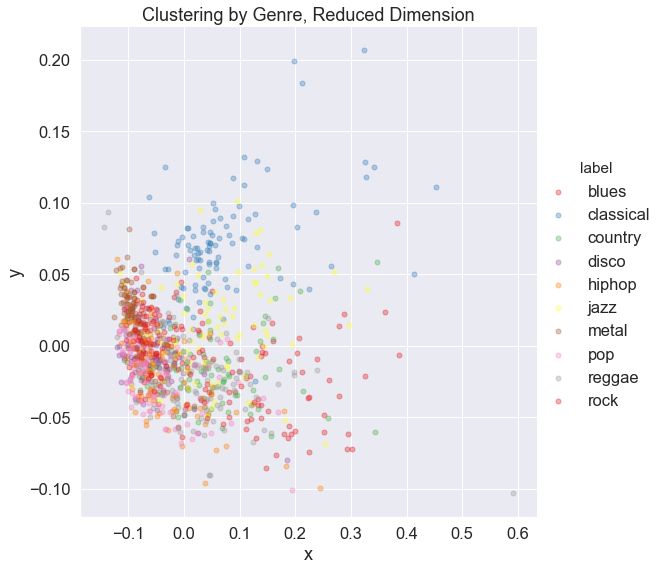

In [27]:
sns.set(font_scale=1.5)
sns.lmplot(data=data, x='x', y='y', hue='label', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.savefig('pca_scatter_genres.png')
plt.title("Clustering by Genre, Reduced Dimension")

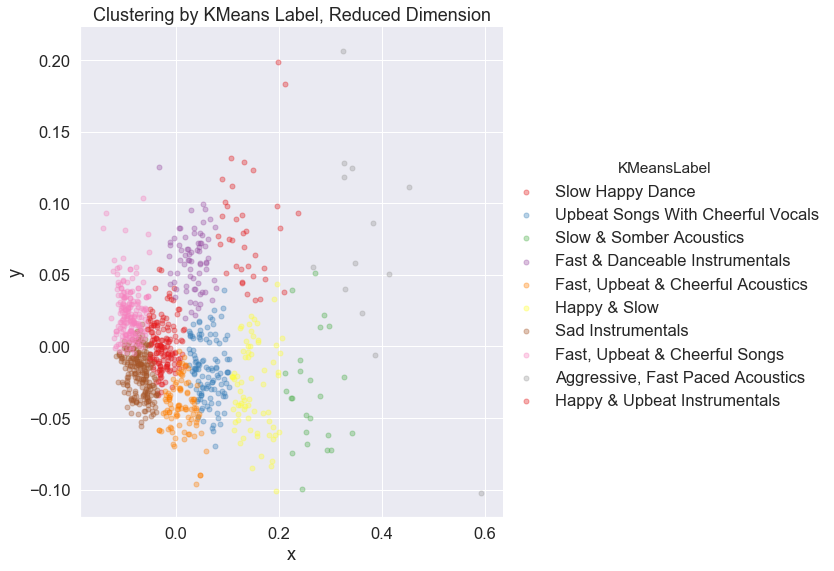

In [28]:
sns.set(font_scale=1.5)
sns.lmplot(data=data, x='x', y='y', hue='KMeansLabel', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.title("Clustering by KMeans Label, Reduced Dimension")
plt.savefig('pca_scatter_KM.png')

In [35]:
print(classification_report(oldclusters,newclusters))

TypeError: '<' not supported between instances of 'float' and 'str'